# Stellargraph Playground

Wir verwenden die Bibliothek Stellargraph um Graphen zu visualisieren und zu analysieren. 
Stellargraph ist eine Bibliothek für Machine Learning auf Graphen, die auf TensorFlow und Keras basiert. 
Sie bietet eine einfache API für das Erstellen, Trainieren und Evaluieren von Graphen-Neuralen Netzen.

In [ ]:
import stellargraph as sg
from stellargraph.data import UniformRandomWalk
from stellargraph.global_utils.global_metrics import global_clustering, global_efficiency
from stellargraph.global_utils.global_metrics import global_betweenness_centrality, global_degree_centrality

import networkx as nx
import pandas as pd
import numpy as np

# load the sample graph data
G = sg.datasets.CyclesGraph()

# define the set of topological indices to evaluate
indices = [
global_clustering,
global_efficiency,
global_betweenness_centrality,
global_degree_centrality,
]

# create a dictionary to store the scores for each index
score = {}

# evaluate the relevance of each index
# relevance is determined by the degree to which the index captures structural properties of the graph
# that are relevant to a wide range of applications
for index in indices:
    score[index] = {"relevance": calculate_relevance(index, G)}

# evaluate the accuracy of each index
# accuracy is determined by the degree to which the calculated values of the index match known ground-truth values
for index in indices:
    score[index]["accuracy"] = calculate_accuracy(index, G)

# evaluate the robustness of each index
# robustness is determined by the degree to which the index maintains its properties under different perturbations
# to the graph structure
for index in indices:
    score[index]["robustness"] = calculate_robustness(index, G)

# evaluate the generalizability of each index
# generalizability is determined by the degree to which the index can be applied to different types of graphs
# and still maintain its usefulness
for index in indices:
    score[index]["generalizability"] = calculate_generalizability(index, G)

# evaluate the interpretability of each index
# interpretability is determined by the degree to which the index can be easily understood and explained
# to others
for index in indices:
    score[index]["interpretability"] = calculate_interpretability(index, G)

# calculate the overall usefulness score for each index
# the overall score is a weighted average of the scores for each dimension
for index in indices:
    overall_score = 0
    for key, value in score[index].items():
        overall_score += value * weight[key]
        score[index]["overall"] = overall_score

# display the final scores for each index
print(score)

In [1]:
import pandas as pd
import numpy as np

import stellargraph as sg
from stellargraph.mapper import PaddedGraphGenerator
from stellargraph.layer import DeepGraphCNN
from stellargraph import StellarGraph

from stellargraph import datasets

from sklearn import model_selection
from IPython.display import display, HTML

from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv1D, MaxPool1D, Dropout, Flatten
from tensorflow.keras.losses import binary_crossentropy
import tensorflow as tf

c:\Users\hoste\anaconda3\envs\stellargraph\lib\site-packages\requests\__init__.py:104: RequestsDependencyWarning: urllib3 (1.26.13) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
dataset = datasets.PROTEINS()
display(HTML(dataset.description))
graphs, graph_labels = dataset.load()

In [3]:
graph_labels = pd.get_dummies(graph_labels, drop_first=True)


In [4]:
generator = PaddedGraphGenerator(graphs=graphs)


In [5]:
k = 35  # the number of rows for the output tensor
layer_sizes = [32, 32, 32, 1]

dgcnn_model = DeepGraphCNN(
    layer_sizes=layer_sizes,
    activations=["tanh", "tanh", "tanh", "tanh"],
    k=k,
    bias=False,
    generator=generator,
)
x_inp, x_out = dgcnn_model.in_out_tensors()

Instructions for updating:
Use fn_output_signature instead


In [6]:
x_out = Conv1D(filters=16, kernel_size=sum(layer_sizes), strides=sum(layer_sizes))(x_out)
x_out = MaxPool1D(pool_size=2)(x_out)

x_out = Conv1D(filters=32, kernel_size=5, strides=1)(x_out)

x_out = Flatten()(x_out)

x_out = Dense(units=128, activation="relu")(x_out)
x_out = Dropout(rate=0.5)(x_out)

predictions = Dense(units=1, activation="sigmoid")(x_out)

In [7]:
model = Model(inputs=x_inp, outputs=predictions)

model.compile(
    optimizer=Adam(lr=0.0001), loss=binary_crossentropy, metrics=["acc"],
)

c:\Users\hoste\anaconda3\envs\stellargraph\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [8]:
train_graphs, test_graphs = model_selection.train_test_split(
    graph_labels, train_size=0.9, test_size=None, stratify=graph_labels,
)

In [9]:
gen = PaddedGraphGenerator(graphs=graphs)

train_gen = gen.flow(
    list(train_graphs.index - 1),
    targets=train_graphs.values,
    batch_size=50,
    symmetric_normalization=False,
)

test_gen = gen.flow(
    list(test_graphs.index - 1),
    targets=test_graphs.values,
    batch_size=1,
    symmetric_normalization=False,
)

In [10]:
epochs = 100
history = model.fit(
    train_gen, epochs=epochs, verbose=1, validation_data=test_gen, shuffle=True,
)

Epoch 1/100


c:\Users\hoste\anaconda3\envs\stellargraph\lib\site-packages\tensorflow\python\framework\indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model/sort_pooling/map/while/gradients/model/sort_pooling/map/while/GatherV2_grad/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model/sort_pooling/map/while/gradients/model/sort_pooling/map/while/GatherV2_grad/Reshape:0", shape=(None, None), dtype=float32), dense_shape=Tensor("gradient_tape/model/sort_pooling/map/while/gradients/model/sort_pooling/map/while/GatherV2_grad/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


21/21 [==============================] - 3s 77ms/step - loss: 0.6576 - acc: 0.6104 - val_loss: 0.5984 - val_acc: 0.6250
Epoch 2/100
21/21 [==============================] - 1s 61ms/step - loss: 0.6208 - acc: 0.6543 - val_loss: 0.5838 - val_acc: 0.7232
Epoch 3/100
21/21 [==============================] - 1s 63ms/step - loss: 0.6092 - acc: 0.6903 - val_loss: 0.5742 - val_acc: 0.7589
Epoch 4/100
21/21 [==============================] - 1s 64ms/step - loss: 0.6011 - acc: 0.7193 - val_loss: 0.5643 - val_acc: 0.7679
Epoch 5/100
21/21 [==============================] - 1s 63ms/step - loss: 0.6019 - acc: 0.7113 - val_loss: 0.5624 - val_acc: 0.7768
Epoch 6/100
21/21 [==============================] - 1s 61ms/step - loss: 0.5979 - acc: 0.7103 - val_loss: 0.5561 - val_acc: 0.7768
Epoch 7/100
21/21 [==============================] - 1s 62ms/step - loss: 0.5879 - acc: 0.7193 - val_loss: 0.5525 - val_acc: 0.7768
Epoch 8/100
21/21 [==============================] - 1s 53ms/step - loss: 0.5930 - acc: 

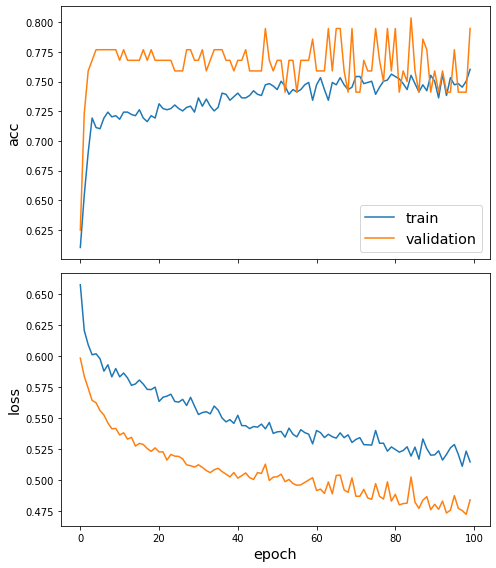

In [11]:
sg.utils.plot_history(history)


In [12]:
test_metrics = model.evaluate(test_gen)
print("\nTest Set Metrics:")
for name, val in zip(model.metrics_names, test_metrics):
    print("\t{}: {:0.4f}".format(name, val))

112/112 [==============================] - 0s 1ms/step - loss: 0.4841 - acc: 0.7946

Test Set Metrics:
	loss: 0.4841
	acc: 0.7946
